In [1]:
import pandas as pd
import matplotlib.pyplot as plt


testcsv = pd.read_csv('../AirplaneDataset/train.csv')

testcsv.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
testcsv.loc[testcsv.satisfaction == 'satisfied', 'satisfaction'] = 1
testcsv.loc[testcsv.satisfaction == 'neutral or dissatisfied', 'satisfaction'] = 0

testcsv.loc[testcsv['Type of Travel'] == 'Business travel', 'Type of Travel'] = 1
testcsv.loc[testcsv['Type of Travel'] == 'Personal Travel', 'Type of Travel'] = 0

testcsv.loc[testcsv['Customer Type'] == 'Loyal Customer', 'Customer Type'] = 1
testcsv.loc[testcsv['Customer Type'] == 'disloyal Customer', 'Customer Type'] = 0

testcsv.loc[testcsv['Gender'] == 'Female', 'Gender'] = 1
testcsv.loc[testcsv['Gender'] == 'Male', 'Gender'] = 0

testcsv.loc[testcsv['Class'] == 'Business', 'Class'] = 2
testcsv.loc[testcsv['Class'] == 'Eco Plus', 'Class'] = 1
testcsv.loc[testcsv['Class'] == 'Eco', 'Class'] = 0

testcsv.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,0,1,13,0,1,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,0,0,25,1,2,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,1,1,26,1,2,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,3,24026,1,1,25,1,2,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,0,1,61,1,2,214,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [3]:
testcsv['Class'].value_counts()

2    49665
0    46745
1     7494
Name: Class, dtype: int64

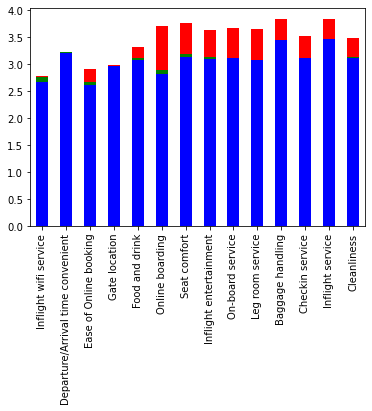

In [4]:
rated_features = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']

testcsv.loc[testcsv['Class'] == 2, rated_features].mean().plot.bar(color='red')
testcsv.loc[testcsv['Class'] == 1, rated_features].mean().plot.bar(color='green')
testcsv.loc[testcsv['Class'] == 0, rated_features].mean().plot.bar(color="blue")

plt.show()